##  SyriaTel Customer Churn Prediction

### Authors: Musi Calori, Jessica Gichimu, Vicker Ivy, Bob Lewis


## 1. Business Understanding

### 1.1 Business Overview

The telecommunications industry has become very competitive over the years, with customer retention emerging as a critical challenge. One of the major issues facing telecom providers is customer churn, a scenario where users discontinue their service, either due to dissatisfaction from the provider or due to the availability of better alternatives. High churn rates can significantly impact a company's overall revenue, and scaling potential.



### 1.2 Problem Statement

SyriaTel, a leading telecom provider, is experiencing a significant loss of customers. To address this challenge, the company seeks to build a robust predictive model capable of identifying customers who are at risk of churning. By using data driven insights and predictive modeling, SyriaTel aims to understand the key drivers of customer churning, determing methods of improving long term retention of customers and enhance long term customer loyalty.

### 1.3 Business Objective

## 2. Data Understanding
In this step, we explore the dataset to understand what kind of information it contains. We look at the different features, their data types, and check for things like missing values or unusual patterns. This helps us get a clear picture of the data before moving on to cleaning and modeling.

### 2.1. Import Libraries
For this project, we will implement the following tools and libraries:

- Numpy: for numerical computations
- Pandas: for data loading, cleaning and manipulation
- Seaborn: for data visualization and EDA
- Matplotlib: for data visualization and EDA
- Scikit-learn: for data preprocessing, predictive modeling and model evaluation.
- Imblearn: for dealing with class imbalance.

In [34]:
# import required libraries

# data loading and manipulation
import pandas as pd
import numpy as np

# data visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# data preprocessing and modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, StandardScaler
from scipy import stats
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay, auc, RocCurveDisplay

# algorithms for supervised learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# suppress warnings for better readability
import warnings
warnings.filterwarnings('ignore')

# Set the seaborn plot size
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

In [35]:
# custom function loading
import importlib
import utility  # import your module
importlib.reload(utility)  # reloads the module to reflect changes

<module 'utility' from 'c:\\Users\\PC\\Documents\\phase three project\\Group5-phase3-project\\utility.py'>

### 2.2 Load the Dataset

We will load the dataset, check the info and summary statistics of the dataset.

In [36]:
# load datasets
churn_df = pd.read_csv('churn.csv')
churn_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [37]:
# check the info of the dataset
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   


From the info() function, we can see the following:

- The dataset contains a total of 3333 records, and 21 columns/features.
- The numerical features are about 16, while the categorical columns are about 4, excluding the target variable, which is churn.

Next, we want to check the descriptive statistics of the dataset. In this section, we will use the describe() function to check for:

- count: The total number of records in each numerical column
- mean: The average value in each numerical column
- std: The standard deviation
- min: The minimum value in each numerical column
- 25%: The 25th percentile value in each numerical column
- 50%: The 50th percentile value (median) in each numerical column
- 75%: The 75th percentile value in each column
max: The maximum value in each column

In [38]:
# check the summary statistics
churn_df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000



To get a better view of the shape of the dataset, as well as the numerical and categorical columns, we can do as follows:

In [39]:

# check the shape of the dataset
print(f"Number of rows: {churn_df.shape[0]}")
print(f"Numbber of columns: {churn_df.shape[1]}\n")

# display the numerical and categorical columns
print(f"Numerical columns: {churn_df.select_dtypes(include='number').columns}\n")
print(f"Categorical columns: {churn_df.select_dtypes(include='object').columns}\n")

Number of rows: 3333
Numbber of columns: 21

Numerical columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

Categorical columns: Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')



### 2.3.  Feature Understanding

Below is a description of all the numerical and categorical features in the dataset: Numerical Features:

- account length: The number of days the customer has been an account holder.
area code: The area code associated with the customer's phone number.
number vmail messages: The number of voice messages received by the customer.
total day minutes: The total number of minutes used by the customer during the day.
total day calls: The total number of calls made by the customer during the day.
total day charge: The total charges incurred by the customer during the day.
total eve minutes: The total number of minutes used by the customer in the evening.
total eve calls: The total number of calls made by the customer in the evening.
total eve charge: The total charges incurred by the customer in the evening.
total night minutes: The total number of minutes spent by the customer at night.
total night calls: The total number of calls made by the customer at night.
total night charge: The total charged incurred by the customer at night.
total intl minutes: The total number of minutes spent by the customer on international calls
total intl calls: The total number of international calls made by the customer
total intl charge: The total charge incurred by the customer on international calls.
customer service calls: The number of calls made by customer service to customers.
Categorical Features:

state: The customer's state of residence.
phone number: The customer's mobile number.
international plan: Indicates if the customer has subscribed to an international plan (Yes/No)
voice mail plan: Indicates if the customer has a voice mail plan (Yes/No)
Now that we have a rudimentary understanding of the data, we can proceed to implementing some data preparation techniques.

## 3. Data Preparation
In this section, we will look into data cleaning techniques, Exploratory Data Analysis (EDA) and data preprocessing (data wrangling) for our dataset. This step is paramount to provide data that will contribute significantly to the performance of the prediction model

### 3.1 Data Cleaning
In this section, we perform some data cleaning techniques on the dataset. These techniques include:

- Checking for null values and handling them.
- Checking for duplicate rows and dropping them.
- Standardizing the columns by adding an underscore between each word in a column, and capitalizing the 1st letter of each word in a column.

We created a function from the file utility.py called clean_nulls_and_duplicates that will perform this task.

In [40]:
# import the clean_nulls_and_duplicates function
from utility import clean_nulls_and_duplicates

# pass in the churn_df dataframe
churn_df = clean_nulls_and_duplicates(churn_df)

Initial shape of the dataset: (3333, 21)

No null values detected.

No duplicate rows detected.
Index(['State', 'Account_Length', 'Area_Code', 'Phone_Number',
       'International_Plan', 'Voice_Mail_Plan', 'Number_Vmail_Messages',
       'Total_Day_Minutes', 'Total_Day_Calls', 'Total_Day_Charge',
       'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge',
       'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge',
       'Total_Intl_Minutes', 'Total_Intl_Calls', 'Total_Intl_Charge',
       'Customer_Service_Calls', 'Churn'],
      dtype='object')

 Final shape of data: (3333, 21)


Next, looking closely into the features, we realized that we may not need the Phone_Number column in our analysis. Therefore, we will drop the column.

In [41]:
# drop the Phone_Number column
churn_df = churn_df.drop('Phone_Number', axis=1)

# check the remaining columns
churn_df.columns

Index(['State', 'Account_Length', 'Area_Code', 'International_Plan',
       'Voice_Mail_Plan', 'Number_Vmail_Messages', 'Total_Day_Minutes',
       'Total_Day_Calls', 'Total_Day_Charge', 'Total_Eve_Minutes',
       'Total_Eve_Calls', 'Total_Eve_Charge', 'Total_Night_Minutes',
       'Total_Night_Calls', 'Total_Night_Charge', 'Total_Intl_Minutes',
       'Total_Intl_Calls', 'Total_Intl_Charge', 'Customer_Service_Calls',
       'Churn'],
      dtype='object')

Still looking into the features, we can see that Area_Code has an integer data type. We will convert this into an object data type. The reason for this conversion is because area codes are unique identifiers for specific areas/zones. For example, area code 415 serves San Francisco and the California area.

In [42]:
# convert 'Area_Code' into an object datatype
churn_df['Area_Code'] = churn_df['Area_Code'].astype(object)
print(churn_df['Area_Code'].dtype)

object


### 3.2 Exploratory Data Analysis

In this section, we will perform a systematic investigation of the dataset to extract insights, evaluate feature distributions, assess relationships between features and the target variables, and identify anomalies, outliers or data quality issues. This helps inform feature engineering decisions and guides the selection of appropriate modeling techniques.

#### 3.2.1. Univariate Analysis

Univariate analysis in EDA aims to explore and analyze each feature in a dataset to understand its distribution, central tendency and spread. It also seeks to detect presence of outliers, anomalies or inconsistencies present in the data.

- Churn Distribution

In this section, we will look at the distribution of the unique values in the Churn column.

Churn counts:
Churn
False    2850
True      483
Name: count, dtype: int64

Churn distribution (%):
Churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


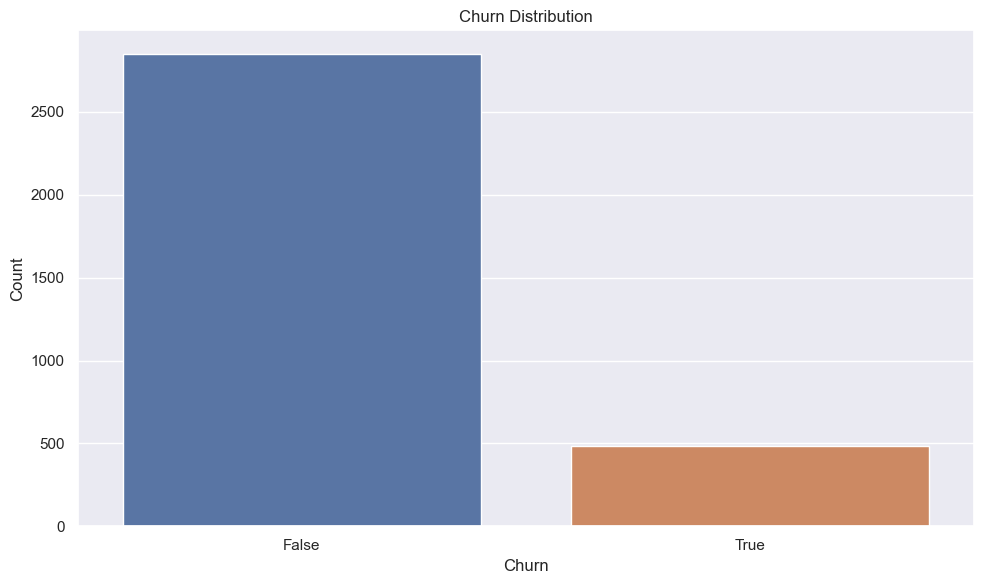

In [43]:
# distribution of the 'Churn' target column

# check the distribution of the unique values
print("Churn counts:")
print(churn_df['Churn'].value_counts())

# check for normalized counts as a percentage
print("\nChurn distribution (%):")
print(churn_df['Churn'].value_counts(normalize=True) * 100)

# visualize with a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=churn_df, palette='deep')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.tight_layout()
plt.show();

From the bar plot, out of the 3333 customers in the dataset, 483 have churned from the company(i.e. terminated their contract), which is about 14.5 % of the total customers. This indicates that the target variable is highly imbalanced. This imbalance can negatively impact the performance of the prediction model by influencing the model to make false predictions. Therefore, this class imbalance should be handled before modeling.

- Area Code Distribution

In this section, we want to see how the distribution of the customers is with regards to the area code. This will aid in determining the area codes that have the most customers.

Area code counts:
Area_Code
415    1655
510     840
408     838
Name: count, dtype: int64

Area code distribution (%):
Area_Code
415    49.654965
510    25.202520
408    25.142514
Name: proportion, dtype: float64


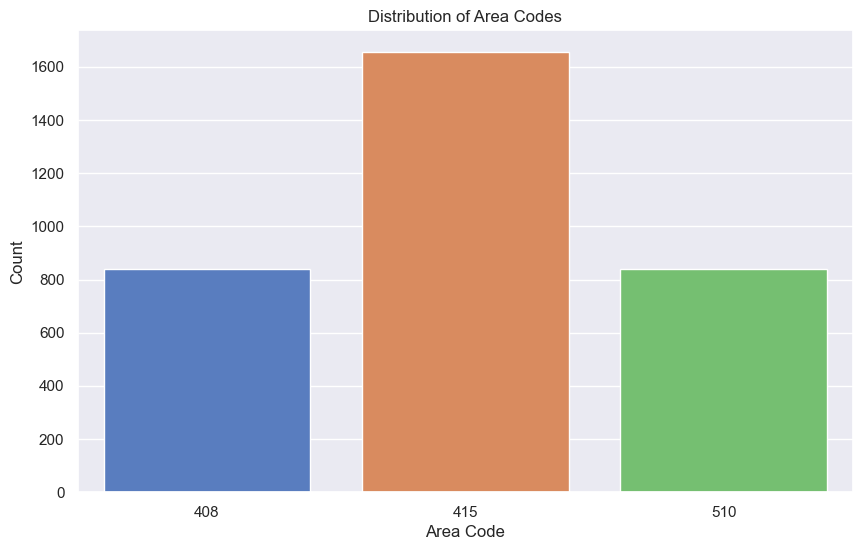

In [44]:
# check the distribution of the unique values
print("Area code counts:")
print(churn_df['Area_Code'].value_counts())

# check for normalized counts as a percentage
print("\nArea code distribution (%):")
print(churn_df['Area_Code'].value_counts(normalize=True) * 100)

# Countplot of area code
plt.figure(figsize=(10, 6))
sns.countplot(x='Area_Code', data=churn_df, palette='muted')
plt.title('Distribution of Area Codes')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.show()

From the plot, area code 415 has a higher number of customers with about 1655 customers, which accounts for approximately 49.7% of the total number of customers. Area codes 408 and 510 have a close number of customers, with area code 408 having 838 customers and area code 510 having 840 customers.

The uneven customer distribution suggests that SyriaTel has a larger customer base concentrated in specific regions. This could indicate:

- Stronger marketing or network presence in those regions.
- Regional preferences for SyriaTel services.

- Distribution of categorical features

In this section, we will explore three main categorical features:

- State
- International_Plan
- Voice_Mail_Plan

We created a function plot_categorical_distributions in utility.py that will take in a dataframe and feature, and return the distribution of the input feature.

We will start with analyzing the State feature.

State counts:
State
WV    106
MN     84
NY     83
AL     80
WI     78
Name: count, dtype: int64


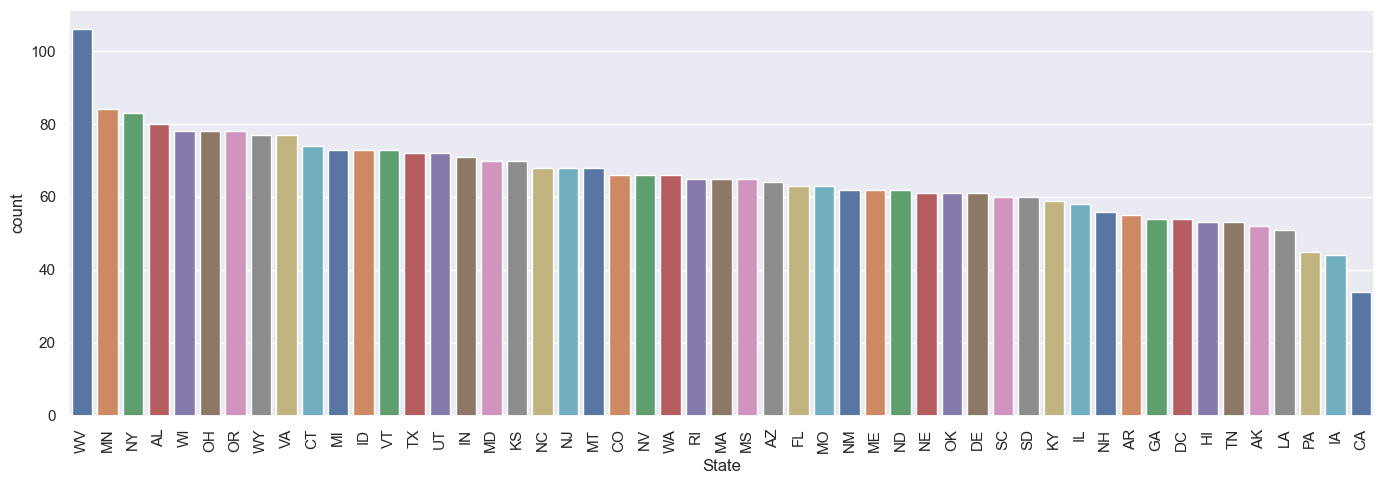

In [45]:
# check the distribution of the unique values
print("State counts:")
print(churn_df['State'].value_counts().head())

# import the function from utility.py
from utility import categorical_distributions

# pass in the dataframe and the 'State' feature
categorical_distributions(churn_df, 'State')

From the plot, the top 5 states from where majority of the customers reside are:

- West Virginia (WV): The state with the highest number of customers (106)
- Minnesota (MN): Has about 84 customers
- New York (NY): Has about 83 customers
- Alabama (AL): Has about 80 customers
- Ohio (OH): Has about 78 customers

Next, we will plot the distribution of the International_Plan feature.

International Plan counts:
International_Plan
no     3010
yes     323
Name: count, dtype: int64

International Plan distribution (%):
International_Plan
no     90.309031
yes     9.690969
Name: proportion, dtype: float64


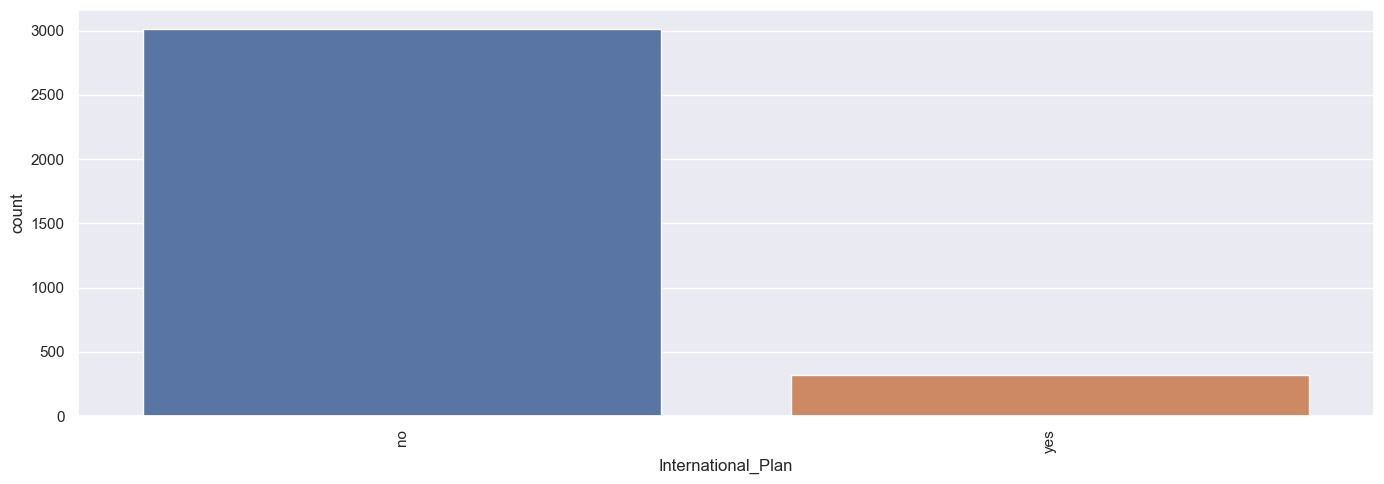

In [46]:
# check the distribution of the unique values
print("International Plan counts:")
print(churn_df['International_Plan'].value_counts())

# check for normalized counts as a percentage
print("\nInternational Plan distribution (%):")
print(churn_df['International_Plan'].value_counts(normalize=True) * 100)

# pass in the dataframe and the 'International_Plan' feature
categorical_distributions(churn_df, 'International_Plan')

From the plot, about 323 customers, which is about 9.7 % of the total customers have an international plan.

Finally, we will plot the distribution of the Voice_Mail_Plan feature.

Voice Mail Plan counts:
Voice_Mail_Plan
no     2411
yes     922
Name: count, dtype: int64

Voice Mail Plan distribution (%):
Voice_Mail_Plan
no     72.337234
yes    27.662766
Name: proportion, dtype: float64


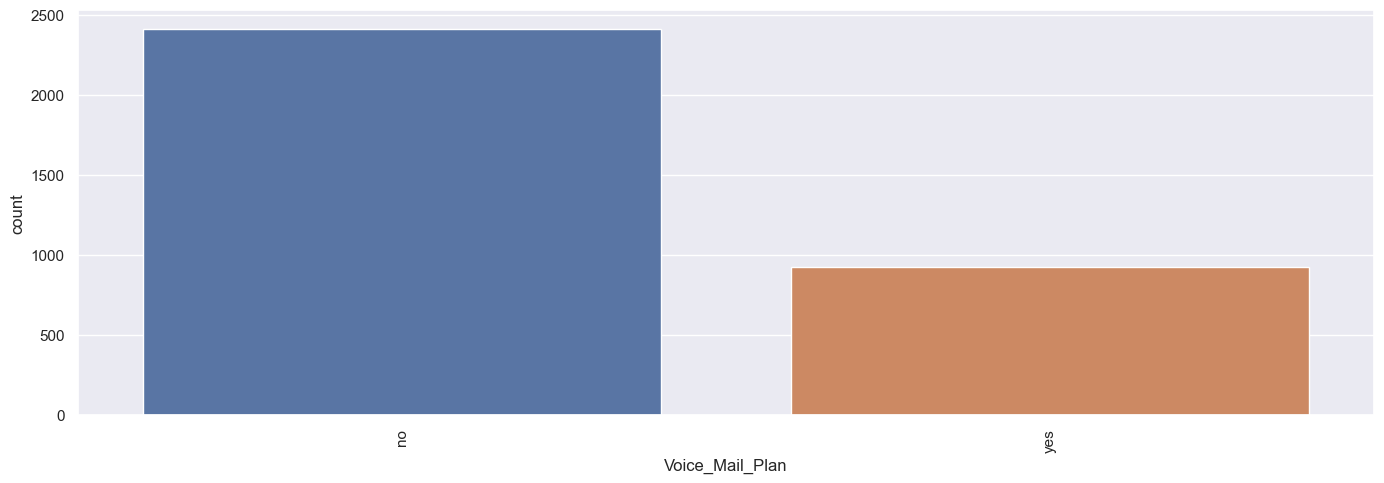

In [47]:
# check the distribution of the unique values
print("Voice Mail Plan counts:")
print(churn_df['Voice_Mail_Plan'].value_counts())

# check for normalized counts as a percentage
print("\nVoice Mail Plan distribution (%):")
print(churn_df['Voice_Mail_Plan'].value_counts(normalize=True) * 100)

# load the categorical_distributions function and pass in the arguments
categorical_distributions(churn_df, 'Voice_Mail_Plan')

From the plot, 922 customers, which is about 27.7% of the total number of customers have a voice mail plan.

- Numerical Features Distribution

In this section, we will plot the distributions of all the numerical features, with Kernel Density Estimation (KDE) curves. This will aid in:

- Understanding customer usage patterns, with features like Total_Day_Minutes. This will inform the usage of the services by the customers.

- Detecting outliers in the dataset. For example, outliers in total charge or minutes could indicate erratic usage linked to churn.

We created a function numerical_distributions in utility.py, that takes in the dataframe, and a list of numerical features, and returns the KDE distribution plots of each feature.

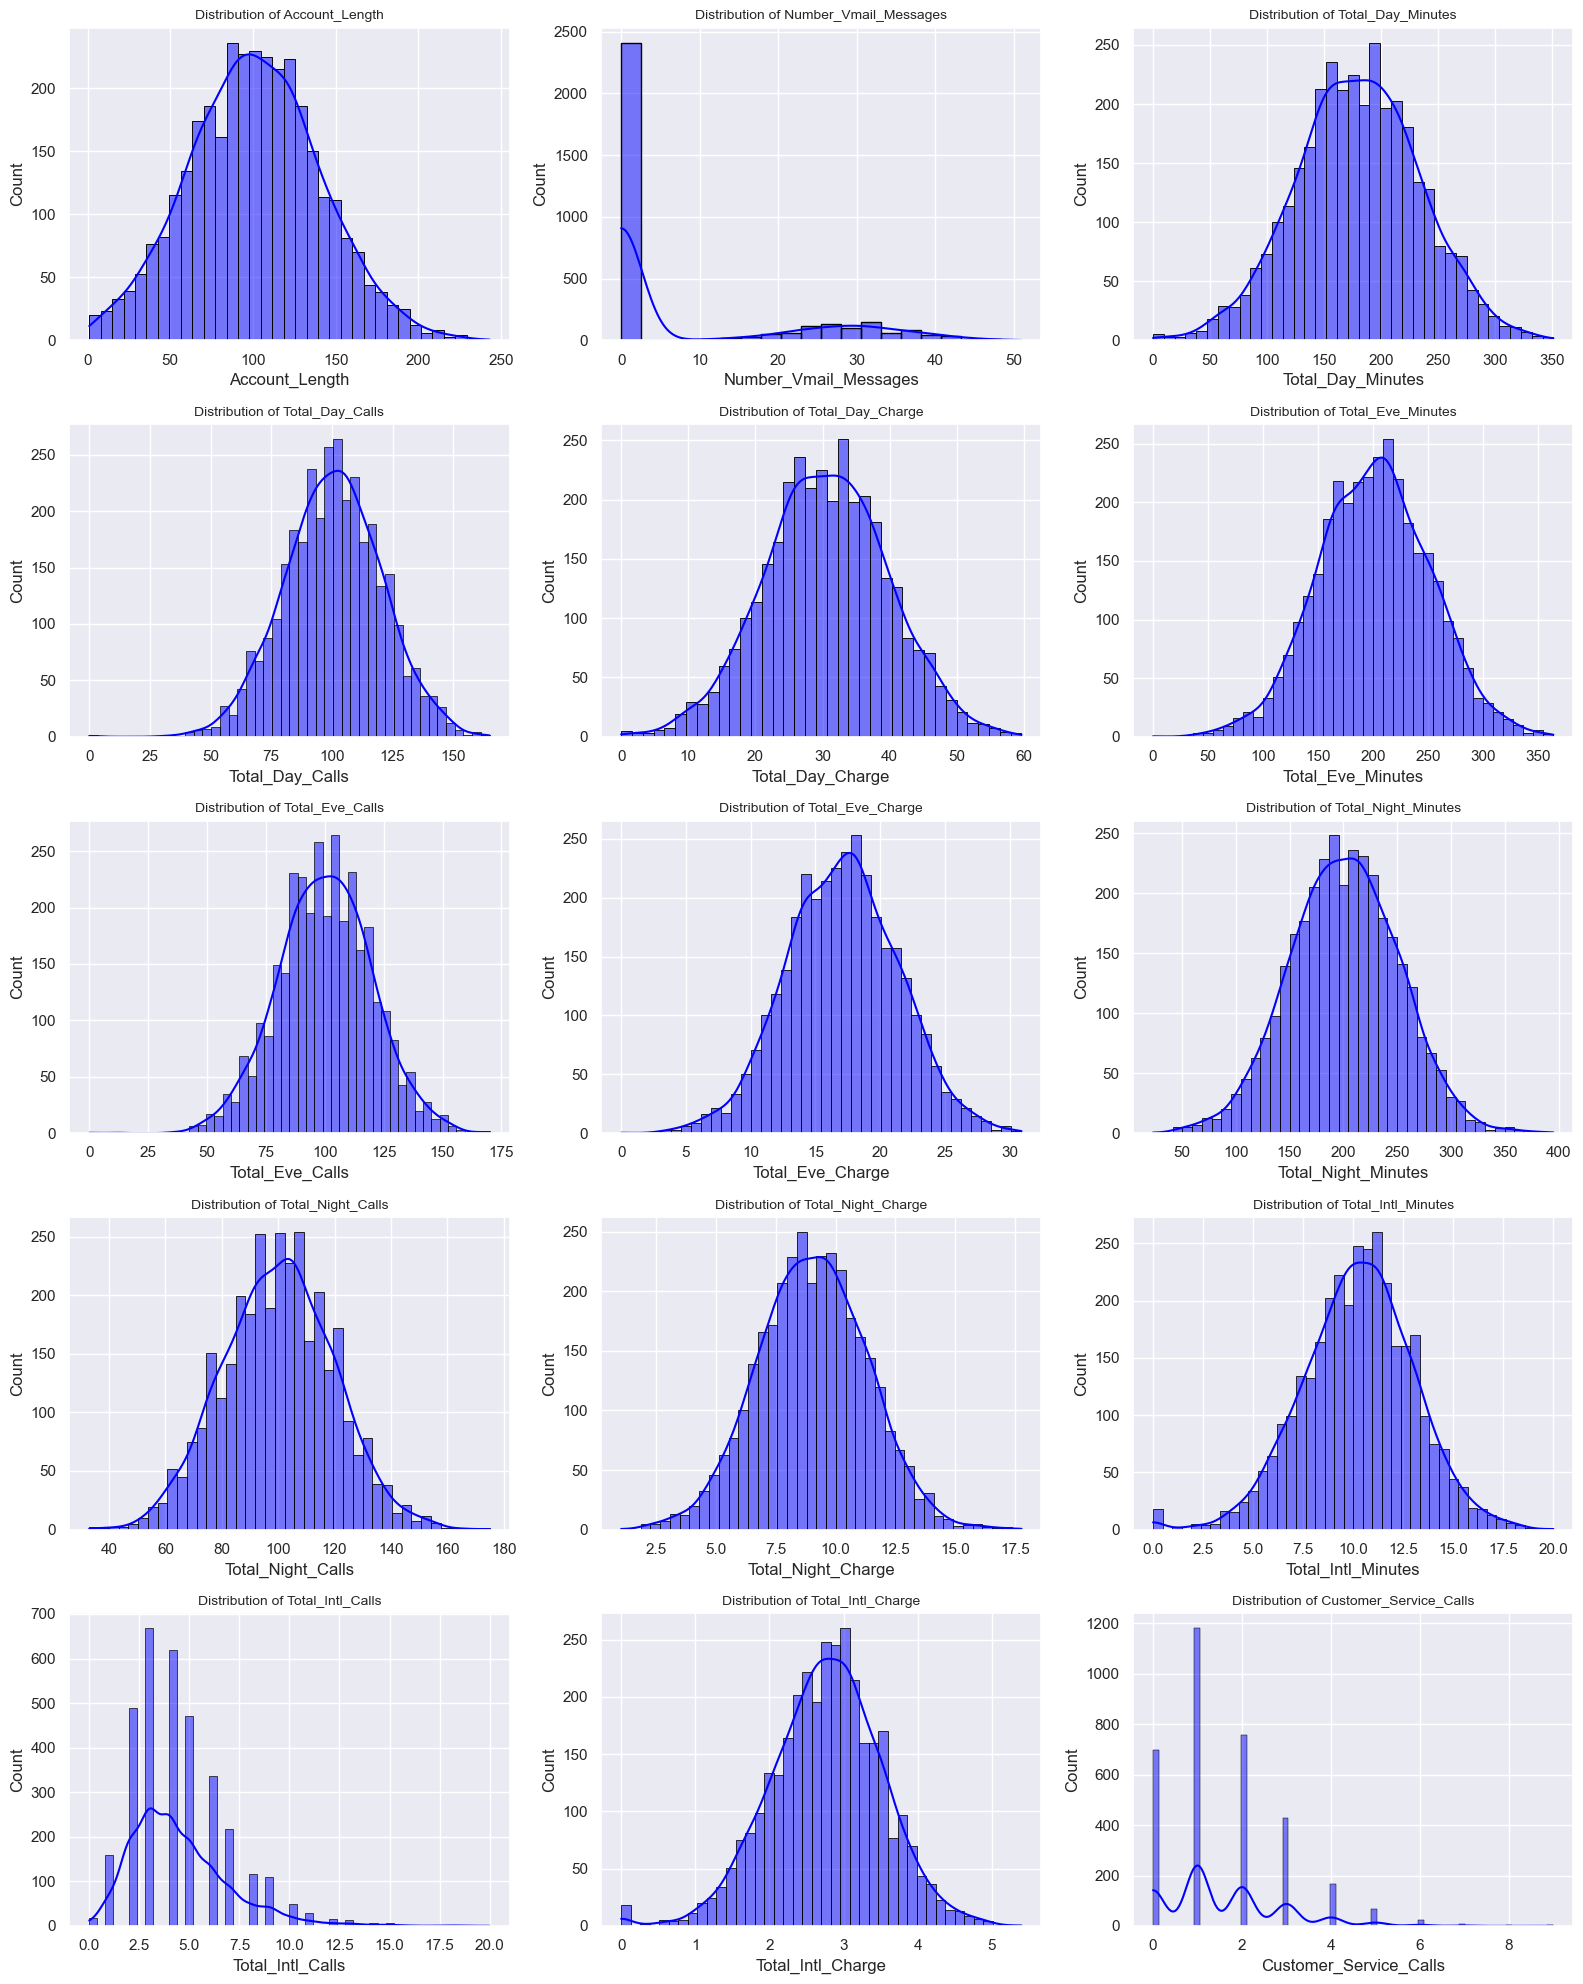

In [48]:
# define the numerical features
numerical_features = [
    'Account_Length', 'Number_Vmail_Messages', 'Total_Day_Minutes', 'Total_Day_Calls', 
    'Total_Day_Charge', 'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge', 
    'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge', 'Total_Intl_Minutes', 
    'Total_Intl_Calls', 'Total_Intl_Charge', 'Customer_Service_Calls'
]

# import the function from 'utility.py'
from utility import numerical_distribution

# call the 'numerical_distributions' function
numerical_distribution(churn_df, numerical_features)

From the plot, all the features, apart from Customer_Service_Calls and Number_Vmail_Messages follow a Normal distribution. Despite the Total_Intl_Calls feature being skewed to the right, it is still normally distributed.

#### 3.2.2. Bivariate Analysis

Bivariate analysis in EDA aids in understanding the relationship between two variables, in this case the relationship between the independent features and the target variable Churn. This is crucial for identifying the predictive features to implement in modeling.

- Categorical features vs Churn

In this section, we will use bar plots to analyze the relationship between the categorical features and Churn. The categorical features we will use are: State, International_Plan and Voice_Mail_Plan.

This will help us in answering questions like:

- Do customers with an international plan or voice mail plan churn more?

We created a function categorical_churn that takes in a dataframe and a feature, and returns the countplot of each feature, with churn as a comparative variable.

We will first plot the State feature

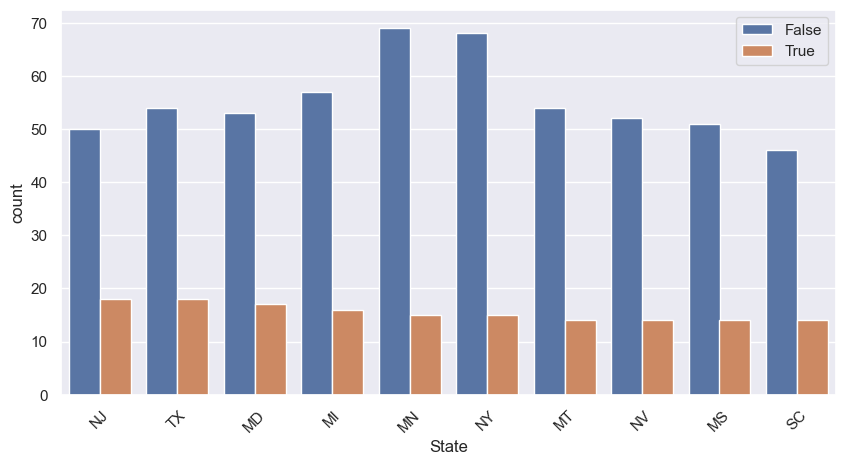

In [49]:
# import the function from utility.py
from utility import categorical_churn

# pass the dataframe and feature
categorical_churn(churn_df, 'State')

From the plot, majority of the customers who churned came from New Jersey, Texas, Maryland, Miami and New York.

Next, we will plot the International_Plan feature.

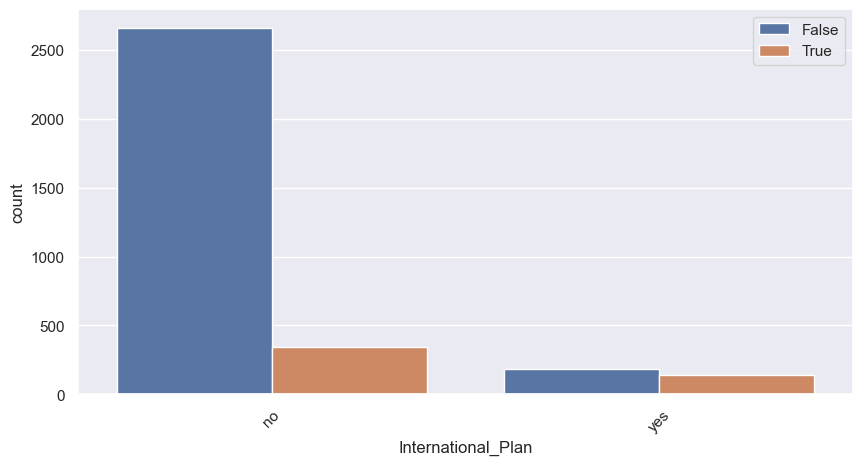

In [50]:
# pass the dataframe and feature
categorical_churn(churn_df, 'International_Plan')

From the plot, most of the customers who churned did not have an international plan.

Finally, we will plot the Voice_Mail_Plan feature.

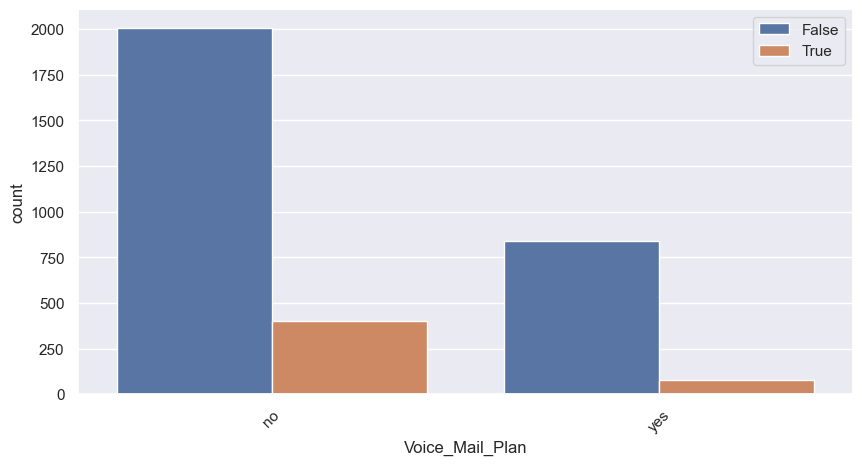

In [51]:
# pass the dataframe and feature
categorical_churn(churn_df, 'Voice_Mail_Plan')

From the plot, most of the customers who churned did not have a voice mail plan.

- Customer Service Calls agains Churn

In this section, we want to visualize the variation in churn with the number of customer service calls. This will help us in determining whether customer service calls are a major contributor towards customer churning.

We will also implement a hue of Area_Code in order to see the area code that had the highest rate of churn.

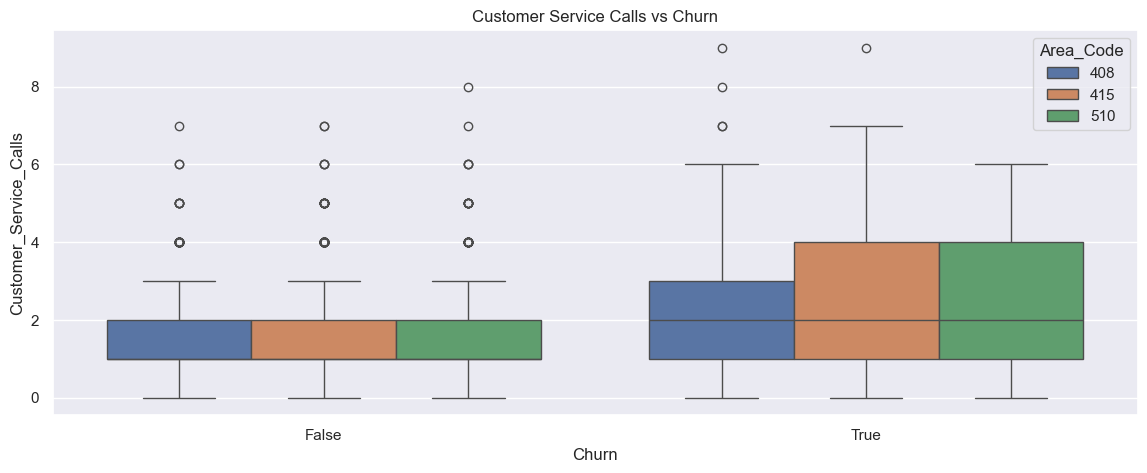

In [52]:
# boxplot to show area code with the highest churn
plt.figure(figsize=(14, 5))
sns.boxplot(data=churn_df, x='Churn', y='Customer_Service_Calls', hue='Area_Code', palette='deep')
plt.title('Customer Service Calls vs Churn')
plt.savefig('images_customer_service_churn.jpg', dpi=300)
plt.show()

From the plot, most of the customers who churned came from area code 415 and 510. In addition, customers who churn from the company tend to have more customer service calls of about 4, than those who do not. It is also evident that there are a number of outliers, which will be dealt with.

- Numerical Features vs Churn

In this section, we will investigate the distribution of certain numerical columns with the churn rate. Specifically, we will use: Total_Day_Charge, Total_Eve_Charge, Total_Night_Charge and Total_Intl_Charge. These 4 plots will help us in understanding the variation of the charging rates with the churn rate. We will use KDE plots to visualize these distributions.

We created a function kde_plots_with_churn, that will take in the dataframe, feature and the charge type(day, evening, night or international)

We will first plot the Total_Day_Charge distribution.

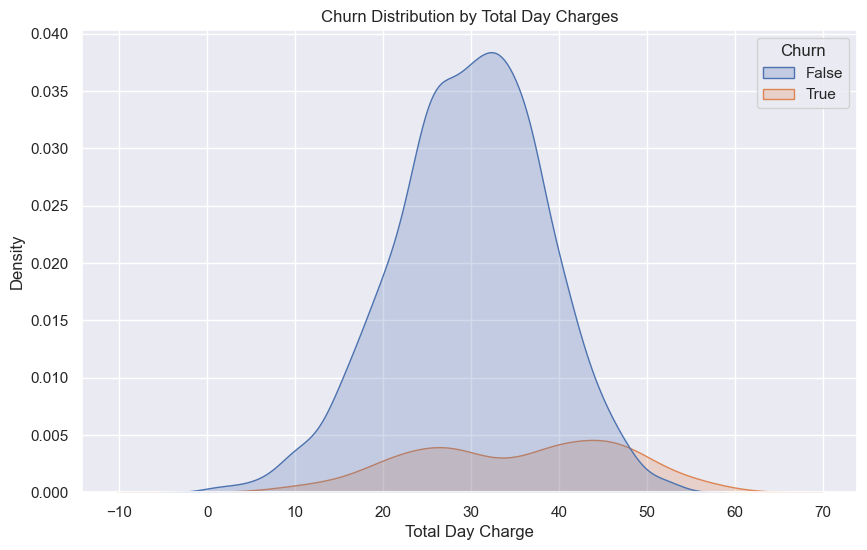

In [53]:
# import the function from utility.py
from utility import kde_plots_with_churn

# pass the dataframe, feature and charge type
kde_plots_with_churn(churn_df, 'Total_Day_Charge', 'Day')

This KDE plot shows the distribution of Total Day Charges for customers who churned as Churn = True vs those who did not as Churn = False. From the plot, the orange (churned) curve has a longer right tail and maintains density at higher values of day charges. This implies that customers who churn tend to have higher day charges than those who do not churn.

Next, we will plot the Total_Eve_Charge feature

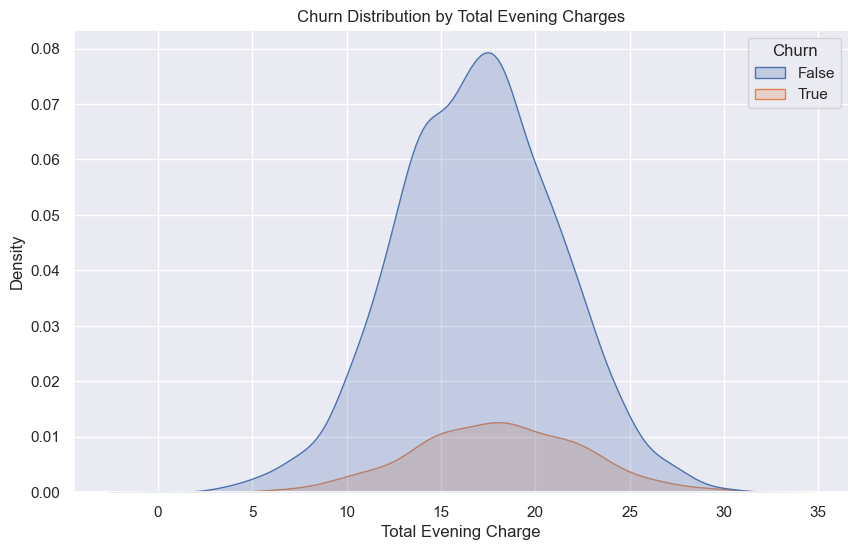

In [54]:
# pass the dataframe, feature and charge type
kde_plots_with_churn(churn_df, 'Total_Eve_Charge', 'Evening')

In this KDE plot, The non-churned group (blue) has a tighter and higher peak between 15-20, while the churned group (orange) is lower and flatter, with a subtle shift towards higher evening charges.

The churned group maintains more density beyond ~25 compared to the non-churned group, similar to the trend seen with the day charges. From this, customers who churned show a slight tendency to have higher evening charges, but the separation between churned and non-churned is less distinct.

Next, we will plot the Total_Night_Charge feature

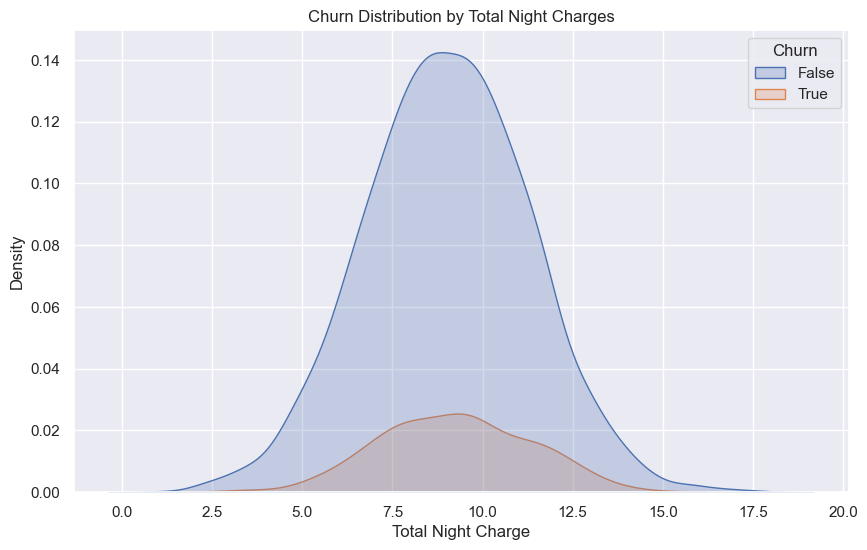

In [55]:
# pass the dataframe, feature and charge type
kde_plots_with_churn(churn_df, 'Total_Night_Charge', 'Night')

From this KDE plot, The two curves heavily overlap, implying that most customers, whether they churned or not, had similar total night charges. In this scenario, we cannot say for sure that majority of the customers who churned had a higher night charge.

Finally, we will plot the Total_Intl_Charge feature

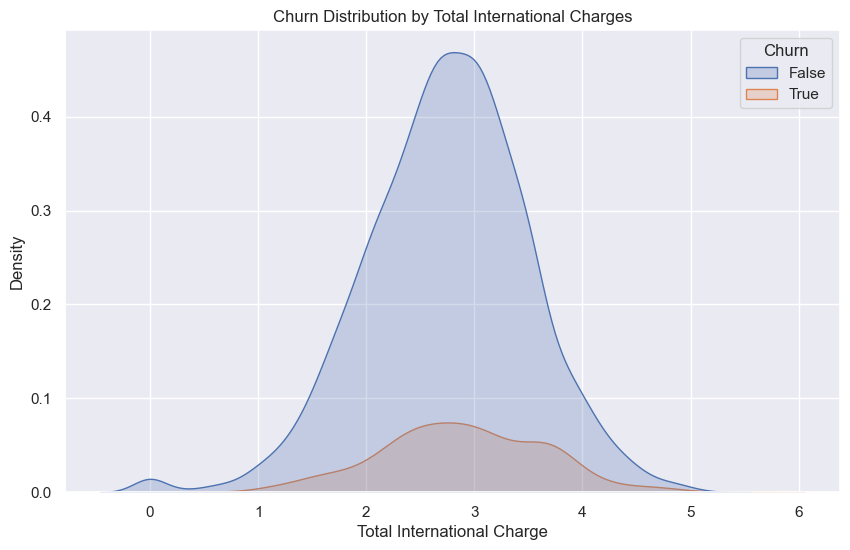

In [56]:
# pass the dataframe, feature and charge type
kde_plots_with_churn(churn_df, 'Total_Intl_Charge', 'International')

From the density plot, The non-churning curve has a tight bell shaped distribution centered around 2.5-3.0 for international charges, which suggests that most loyal customers have moderate international usage patterns, with relatively little variation.

On the other hand, the churning curve shows a broader, flatter distribution that extends further to the right, with multiple peaks around 3.0-4.0. This indicates churned customers tend to have higher international charges and more varied usage patterns

Based on this analysis, customers with very low international charges (< 1.0) rarely churn, suggesting basic users tend to stay. The "tail" of high international charges (> 4.0) is dominated by churned customers, suggesting very high international usage may be a churn risk factor.

#### 3.2.3. Feature correlation

In this section, we will use a correlation heatmap to measure the correlation between the features and the target variable.

We created a function correlation_heatmap that takes in a dataframe and returns a correlation heatmap of the various numerical columns with the target variable.

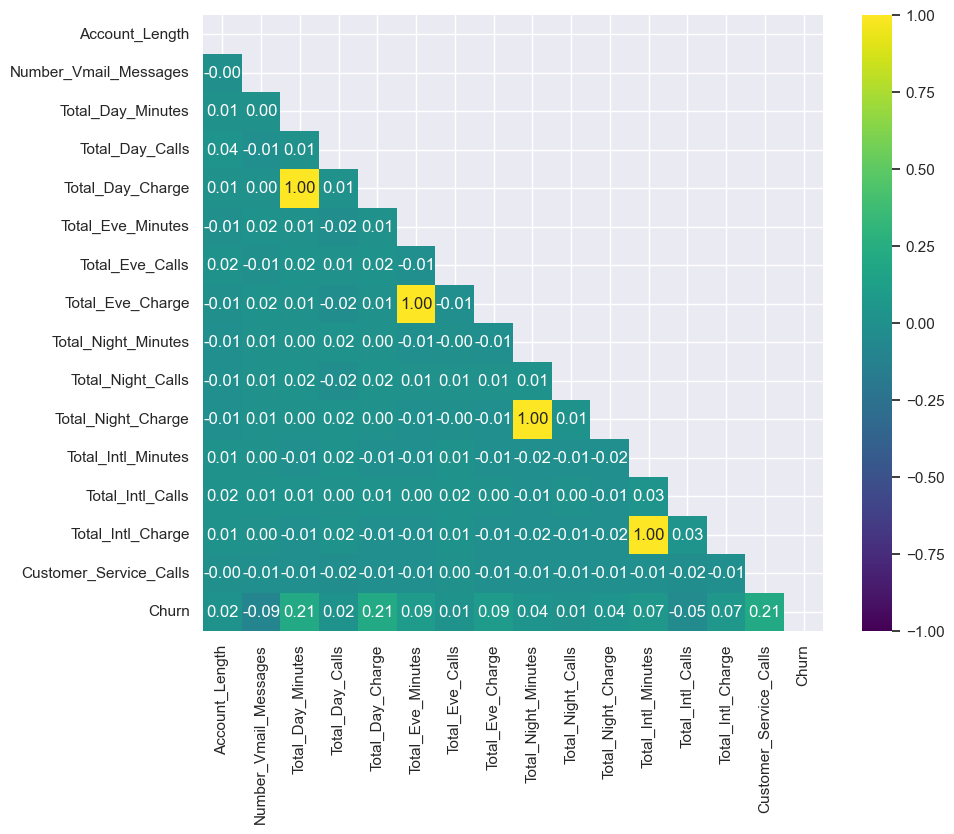

In [59]:
# import the function fro utility.py
from utility import correlation_heatmap

corr_matrix = churn_df.corr(numeric_only=True)

# create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap="viridis",
    annot=True,
    fmt=".2f",
    vmin=-1,
    vmax=1
)
plt.show()


From the correlation heatmap, some of the features share a perfect correlation of 1.0. They include:

- Total_Day_Charge and Total_Day_Minutes features, which are fully positively correlated.
- Total_Eve_Charge and Total_Eve_Minutes features, which are fully positively correlated.
- Total_Night_Charge and Total_Night_Minutes features, which are fully positively correlated.
- Total_Intl_Charge and Total_Intl_Minutes features, which are fully positively correlated.

These perfect correlations indicate a completely linear relationship between usage and charges within each time period. This suggests:

- Fixed per-minute rates for each time period
- No complexity in pricing.

However, from a modeling perspective, this causes severe multicollinearity because one varibale is perfectly predictable from the other.

#### 3.2.4. Multicollinearity check

Multicollinearity occurs when two or more independent variables in a dataset are highly correlated, implying that they provide overlapping information. This can lead to unreliable model coefficients, and reduced model interpretability. In order to address this challenge, we will compute the correlation matrix, and drop one feature from each pair of variables with a correlation coefficient greater than 0.9. This threshold will help eliminate repetition while preserving the most informative features. Removing highly correlated features improves model stability, reduces overfitting risk and ensures that each remaining variable contributes uniquely and significantly to the model's predictions.

In this section, we created a function drop_highly_correlated_features that takes in a dataframe, and returs a dataframe with dropped features.

In [60]:
# import the function from utility.py
from utility import drop_highly_correlated_features
 #pass in the dataframe
cleaned_churn_df, dropped_features = drop_highly_correlated_features(churn_df, threshold=0.9)

# display the dropped features
print("Dropped Features:", dropped_features)

# display the correlation matrix
correlation_matrix = cleaned_churn_df.corr(numeric_only=True)

print("\nCorrelation Matrix:")
print(correlation_matrix.round(2))  # rounded for readabil


Dropping 4 highly correlated features (r > 0.9): ['Total_Day_Minutes', 'Total_Eve_Minutes', 'Total_Night_Minutes', 'Total_Intl_Minutes']
Dropped Features: ['Total_Day_Minutes', 'Total_Eve_Minutes', 'Total_Night_Minutes', 'Total_Intl_Minutes']

Correlation Matrix:
                        Account_Length  Number_Vmail_Messages  \
Account_Length                    1.00                  -0.00   
Number_Vmail_Messages            -0.00                   1.00   
Total_Day_Calls                   0.04                  -0.01   
Total_Day_Charge                  0.01                   0.00   
Total_Eve_Calls                   0.02                  -0.01   
Total_Eve_Charge                 -0.01                   0.02   
Total_Night_Calls                -0.01                   0.01   
Total_Night_Charge               -0.01                   0.01   
Total_Intl_Calls                  0.02                   0.01   
Total_Intl_Charge                 0.01                   0.00   
Customer_Service_Call

We have succesfully dropped the highly correlated features: Total_Day_Minutes, Total_Eve_Minutes, Total_Night_Minutes and Total_Intl_Minutes

We may have to deal with the class imbalance for a more robust model performance.

#### 3.2.5. Handling outliers

Outliers are data points that significantly differ from other observations and can distort machine learning models. They may arise from data entry errors, meaurement anomlies or genuine but rare events.

To handle them, we first identify outliers using Z-score, which measures how many standard deviations a value is from the mean. In this case, we use the Z-score method to filter out numerical outliers, removing any row where a feature's Z-score exceeds a defined threshold, which in this case is 3. This approach ensures a cleaner dataset for more reliable modeling.

We created a function remove_outliers_zscore that takes in a dataframe and returns a new dataframe with rows removed where any numerical column has a Z-score exceeding a threshold of 3.

In [61]:
# import the function fro utility.py
from utility import remove_outliers_zscore

# pass in the dataframe
cleaned_churn_df = remove_outliers_zscore(cleaned_churn_df, z_threshold=3.0)

# print the shape of the new dataframe
print("Shape of dataset after removing outliers:", cleaned_churn_df.shape)

Shape of dataset after removing outliers: (3169, 16)


How the code works:

- Identify numeric columns: We select all columns of numeric dtype (integers and floats)

- Compute the Z-scores: Using scipy.stats.zscore() on only the numeric columns. Any NaNs detected in the numeric columns are temporarily treated in such a way that they don't trigger an outlier removal. We fill the Nans with a 0 for comparison.

- Create a boolean mask: For each row, check if any numeric column's absolute Z-score is <= z_threshold. Rows that fail, those that have at least one numeric value beyond the threshold, get dropped.

- Return a filtered DataFrame: We use .loc[mask] to keep only rows that passed the Z-score test and return a fresh copy.

### 3.3. Data Preprocessing

Data preprocessing is the process of transforming raw data into a usable format for analysis or modeling. It involves steps like encoding categorical variables and scaling features. Proper preprocessing ensures that the data is accurate, consistent and suitable for machine learning algorithms.

In this section we will perform the following preprocessing steps: Label Encoding, One-Hot Encoding and Feature Scaling.

#### 3.3.1. One-Hot Encoding

This is a technique used to convert categorical variables into a numerical format. It creates binary (0 or 1) columns for each category, indicating the presence of a category in a given observation. This method allows machine learning models to process categorical data without assuming any ordinal relationship.

In this section, we will perform one-hot encoding on the following columns: State, Area_Code, International_Plan and Voice_Mail_Plan.

In [62]:
# one-hot encode the categorical columns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# List of categorical columns to encode
categorical_cols = ['State', 'Area_Code', 'International_Plan', 'Voice_Mail_Plan']

# create the ColumnTransformer with OneHotEncoder -> allows the application of different preprocessing
# steps to different columns in a dataframe
one_hot_encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'  # Keep all other columns as they are
)

# fit and transform the data
encoded_array = one_hot_encoder.fit_transform(cleaned_churn_df)

# get the new column names from the encoder
encoded_columns = one_hot_encoder.named_transformers_['onehot'].get_feature_names_out(categorical_cols)

# create a new DataFrame with the encoded data
preprocessed_churn_df = pd.DataFrame(encoded_array, columns=list(encoded_columns) + list(cleaned_churn_df.drop(columns=categorical_cols).columns))

# view the shape of the encoded DataFrame
preprocessed_churn_df.shape

(3169, 66)

#### 3.3.2. Label Encoding

Label Encoding is a technique used to convert categorical text data into numerical values. Each unique category is assigned an integer label. In this section, we will use label encoding on the Churn target variable to encode it to 0 (False) and 1 (True).

In [63]:
# use label encoding on Churn column
label_encoder = LabelEncoder()
preprocessed_churn_df['Churn'] = label_encoder.fit_transform(preprocessed_churn_df['Churn'])

# display first 5 rows
preprocessed_churn_df['Churn'].head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int32

#### 3.3.3. Data Scaling

This is the process of transforming features so they fall within a similar range. It ensures that no feature dominates another due to its magnitude, which helps improve model performance and convergence.

In this section, we will implement Min-Max scaling in order to normalize the features to a fixed range of -1 to 1. This will ensure that each feature contributes equally during model training. This step will be taken in the modeling phase, when we define our X and y variables.

## 4. Modelling
In this section, we will build a prediction model that can predict customer churn based on the features in our dataset. This stage is very critical as it will help us in knowing the actual customers who churn in the company, and will guide in providing key insights that will necessitate the retention of customers in the company.

In order to build a robust, effective model, we will train and evaluate five different models, and pick the model that will portray the highest performance on unseen data. These 5 models include:

- Logistic Regression: This will be our baseline model
- Decision Tree
- Random Forest
- K_nearest Neighbor (KNN)
- Gradient Boosting Classifier

In evaluating our models, we will use the recall and ROC-AUC metrics to monitor model performance.

First, we will define our X and y variables. The X variable will represent the features in the dataset, while the y variable will represent the target.

In [64]:
# define X and y variables
X = preprocessed_churn_df.drop(columns='Churn', axis=1)
y = preprocessed_churn_df['Churn']

# display the first 5 rows of X
X.head()

,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,...,Number_Vmail_Messages,Total_Day_Calls,Total_Day_Charge,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Calls,Total_Night_Charge,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25,110,45.07,99,16.78,91,11.01,3,2.7,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26,123,27.47,103,16.62,103,11.45,3,3.7,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,114,41.38,110,10.3,104,7.32,5,3.29,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,71,50.9,88,5.26,89,8.86,7,1.78,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,113,28.34,122,12.61,121,8.41,3,2.73,3


Now that we have defined our X and y variables, we can split the data into train and test sets. We will use an 80/20 split, implying that 80% of the data will go to training, and 20% of the data will go to testing.

We will also Scale the X features using a MinMaxScaler() function. This is because this function scales the numerical values to a range of (0,1), which is ideal for models such as K-Nearest Neighbors and Logistic Regression models.

In [65]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# scale the train and test features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# display the shape of thr train and test sets
print("Shape of scaled X_train:", X_train_scaled.shape)
print("Shape of scaled X_test:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of scaled X_train: (2535, 65)
Shape of scaled X_test: (634, 65)
Shape of y_train: (2535,)
Shape of y_test: (634,)


## 4.1. Class Imbalance
From our earlier analysis, we observed that the target variable has a high class imbalance. We can show this again using the y_train variable:

In [66]:
# check the distribution of the unique values
print("Churn counts:")
print(y_train.value_counts())

# check for normalized counts as a percentage
print("\nChurn distribution (%):")
print(y_train.value_counts(normalize=True) * 100)

Churn counts:
Churn
0    2181
1     354
Name: count, dtype: int64

Churn distribution (%):
Churn
0    86.035503
1    13.964497
Name: proportion, dtype: float64


The 0 class has a count of 2181, which is about 86.04%, while the 1 class has a count of 354, which is about 13.97%. This shows a very huge imbalance in the two classes in the target variable. To address this, we will use a technique known as SMOTE(Synthetic Minority Over-Sampling Technique). This technique is an oversampling method that generates synthetic samples from the minority class by interpolating between existing minority class samples.

SMOTE works by selecting examples from the minority class, and generating examples by choosing a random point along the line between a sample and one of its nearest neighbors from the minority class. These new synthetic samples are then used to balance the dataset, which helps ML models to learn better and avoid bias toward the majority class.

In this section, we will apply SMOTE to our train dataset to obtained a balanced pair of training data.

In [67]:
# import the imblearn library
from imblearn.over_sampling import SMOTE, SMOTENC

# instantiate the SMOTE function
smote = SMOTENC(categorical_features=[1, 2], random_state=42)

# fit and resample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# check the unique values in y_train
y_train_smote.value_counts()

Churn
0    2181
1    2181
Name: count, dtype: int64

Now that we have balanced the dataset, we can proceed to the actual modeling. We will start with the LogisticRegression() as our baseline model, and build other models sequentially.

### 4.2. Logistic Regression.

In [68]:
#BASELINE MODEL

# instantiate a Logistic regression model
log_model = LogisticRegression(random_state=42)

# fit the training data
log_model.fit(X_train_smote, y_train_smote)

# make predictions on test set
y_pred_log = log_model.predict(X_test_scaled)

# compute the accuracy of the model
log_acc = accuracy_score(y_test, y_pred_log)
print("Logistic Regression model accuracy:", log_acc)

Logistic Regression model accuracy: 0.7823343848580442


In [69]:
# display the classification report
log_report = classification_report(y_true=y_test, y_pred=y_pred_log)
print("Logistic Regression classification report\n")
print(log_report)

Logistic Regression classification report

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       546
           1       0.36      0.75      0.49        88

    accuracy                           0.78       634
   macro avg       0.66      0.77      0.68       634
weighted avg       0.87      0.78      0.81       634



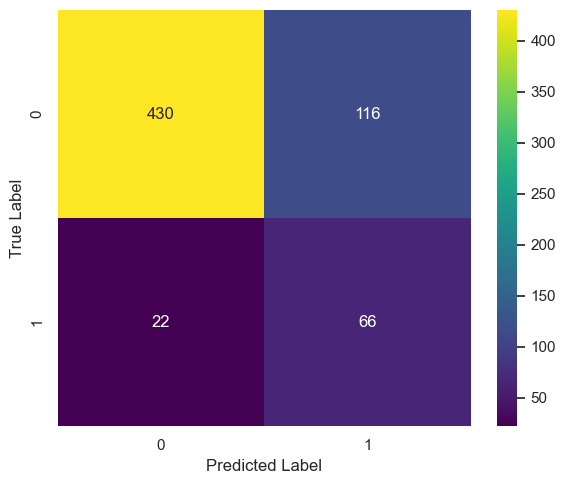

In [70]:
# import the confusion_matrix function
from utility import plot_confusion_matrix

# plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_log, class_labels=[0, 1])

### 4.3. Decision Tree Classifier

In [72]:
# Instantiate a decision tree model
dec_model = DecisionTreeClassifier(random_state=42)

# fit the training data
dec_model.fit(X_train_smote, y_train_smote)

# make predictions on test set
y_pred_dec = dec_model.predict(X_test_scaled)

# compute the accuracy of the model
dec_acc = accuracy_score(y_test, y_pred_dec)
print("Decision Tree model accuracy:", dec_acc)

Decision Tree model accuracy: 0.8974763406940063


In [73]:
# display the classification report
dec_report = classification_report(y_true=y_test, y_pred=y_pred_dec)
print("Decision Tree classification report\n")
print(dec_report)

Decision Tree classification report

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       546
           1       0.61      0.75      0.67        88

    accuracy                           0.90       634
   macro avg       0.78      0.84      0.80       634
weighted avg       0.91      0.90      0.90       634



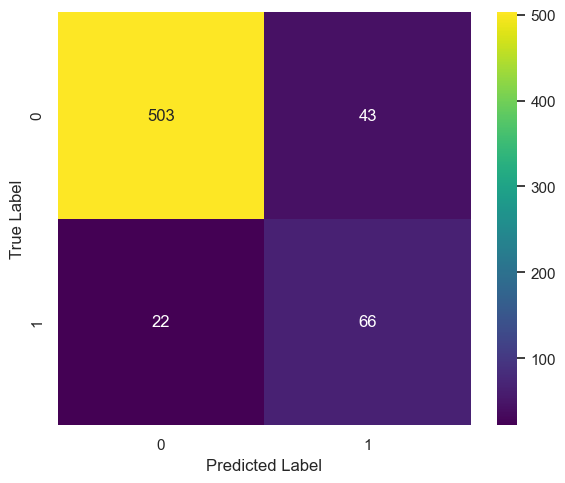

In [74]:
# plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_dec, class_labels=[0, 1])

### 4.4. Random Forest Classifier

In [75]:
# instantiate a random forest model
ran_model = RandomForestClassifier(random_state=42)

# fit the training data
ran_model.fit(X_train_smote, y_train_smote)

# make predictions on test set
y_pred_ran = ran_model.predict(X_test_scaled)

# compute the accuracy of the model
ran_acc = accuracy_score(y_test, y_pred_ran)
print("Random Forest model accuracy:", ran_acc)

Random Forest model accuracy: 0.917981072555205


In [76]:
 #display the classification report
ran_report = classification_report(y_true=y_test, y_pred=y_pred_ran)
print("Random Forest classification report\n")
print(ran_report)

Random Forest classification report

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       546
           1       0.70      0.73      0.71        88

    accuracy                           0.92       634
   macro avg       0.83      0.84      0.83       634
weighted avg       0.92      0.92      0.92       634



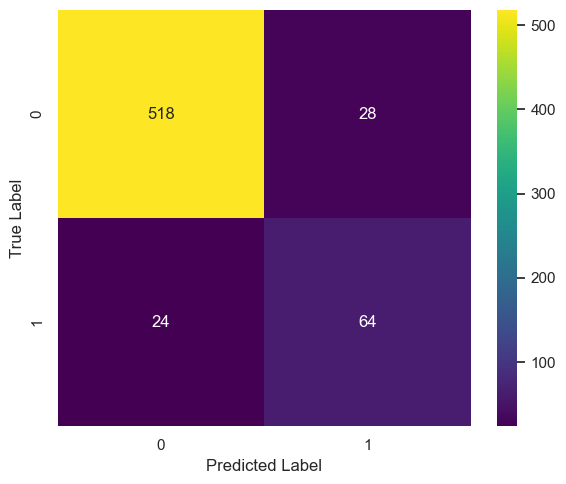

In [77]:
# plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_ran, class_labels=[0, 1])

The Random Forest model has a recall score of about 0.73, which is lower than the recall scores of the Decision Tree and Logistic Regression models. This implies that out of all the customers who churned from the company, the model was able to predict 73% of them correctly.

From the confusion matrix plot, the true positive and true negative have the highest values, implying that the model is making correct predictions more frequently than incorrect predictions. This also shows that the model is not overfitting (i.e. performing poorly on unseen test data)

### 4.6. K-Nearest Neighbor Classifier

In [78]:
# instantiate a K-nearest neighbor model
knn_model = KNeighborsClassifier(n_neighbors=5) # start with 5 neighbors

# fit the training data
knn_model.fit(X_train_smote, y_train_smote)

# make predictions on test set
y_pred_knn = knn_model.predict(X_test_scaled)

# compute the accuracy of the model
knn_acc = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbor model accuracy:", knn_acc)

K-Nearest Neighbor model accuracy: 0.7365930599369085


In [79]:
# display the classification report
knn_report = classification_report(y_true=y_test, y_pred=y_pred_knn)
print("K-Nearest Neighbor classification report\n")
print(knn_report)

K-Nearest Neighbor classification report

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       546
           1       0.23      0.40      0.30        88

    accuracy                           0.74       634
   macro avg       0.56      0.59      0.57       634
weighted avg       0.80      0.74      0.76       634



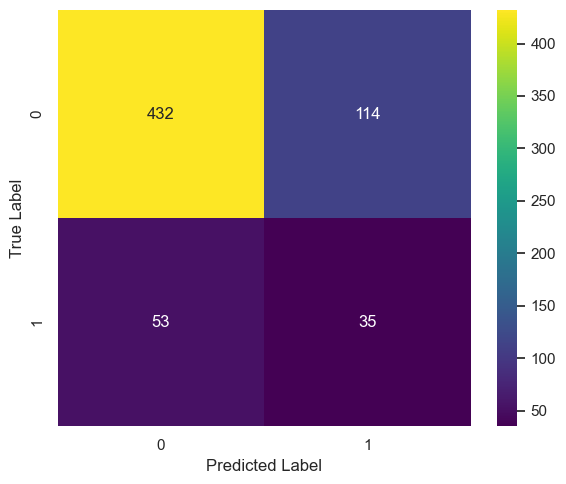

In [81]:
# plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_knn, class_labels=[0, 1])

The K-Nearest Neighbor model has a recall score of about 0.4, which is much lower than the recall scores of the other models. This implies that out of all the customers who churned from the company, the model was able to predict 40% of them correctly, which is a very low prediction rate, lower than average (50%).

From the confusion matrix plot, however, the true positive and true negative have the highest values, implying that the model, despite having a lower recall, is still making correct predictions more frequently than incorrect predictions.

### 4.7. Gradient Boosting Classifier

In [82]:
# instantiate a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42) 

# fit the training data
gb_model.fit(X_train_smote, y_train_smote)

# make predictions on test set
y_pred_gb = gb_model.predict(X_test_scaled)

# compute the accuracy of the model
gb_acc = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting model accuracy:", gb_acc)

Gradient Boosting model accuracy: 0.9290220820189274


In [83]:
# display the classification report
gb_report = classification_report(y_true=y_test, y_pred=y_pred_gb)
print("Gradient Boosting classification report\n")
print(gb_report)

Gradient Boosting classification report

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       546
           1       0.72      0.81      0.76        88

    accuracy                           0.93       634
   macro avg       0.84      0.88      0.86       634
weighted avg       0.93      0.93      0.93       634



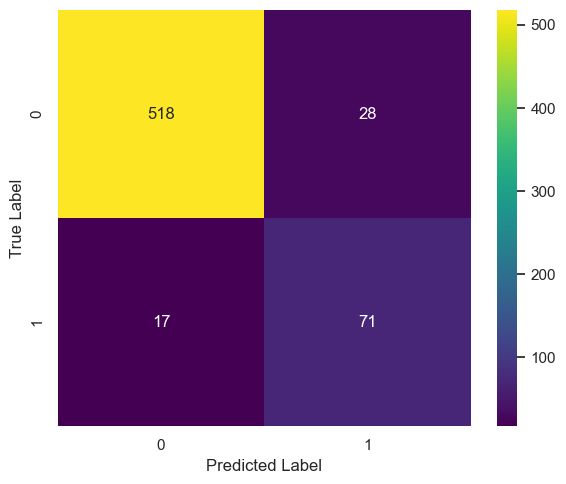

In [84]:
# plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_gb, class_labels=[0, 1])

The Gradient Boosting model has a recall score of about 0.81, which is higher than the recall scores of the other models. This implies that out of all the customers who churned from the company, the model was able to predict 81% of them correctly, which is the best prediction rate thus far.

From the confusion matrix plot, the true positive and true negative have the highest values, implying that the model is making correct predictions more frequently than incorrect predictions. This also shows that the model is not overfitting (i.e. performing poorly on unseen test data).

### 5. Model Evaluation
In this section, we will evaluate the model performance, and pick the best two, which we will perform hyperparameter tuning on, to select the best performing model. As I had mentioned before, we will use recall and ROC-AUC Curve, to measure model performance.

### 5.1. ROC Curve
An ROC (Receiver Operating Characteristic) curve is a graphical representation used to evaluate the performance of a binary classification model. It plots the True Positive Rate (TPR) (Recall) against the False Positive Rate (FPR) at various threshold settings. The curve illustrates how well a model distinguishes between the two classes.

A model with a good performance will have a curve that bows toward the top-left corner of the plot. The Area Under the Curve (AUC) provides a single number summary of performance - the closer the AUC is to 1, the better the model. An ROC curve is useful for comparing multiple models' diagnostic ability.

We will plot the ROC curves of all the 6 models and compare the AUC scores.

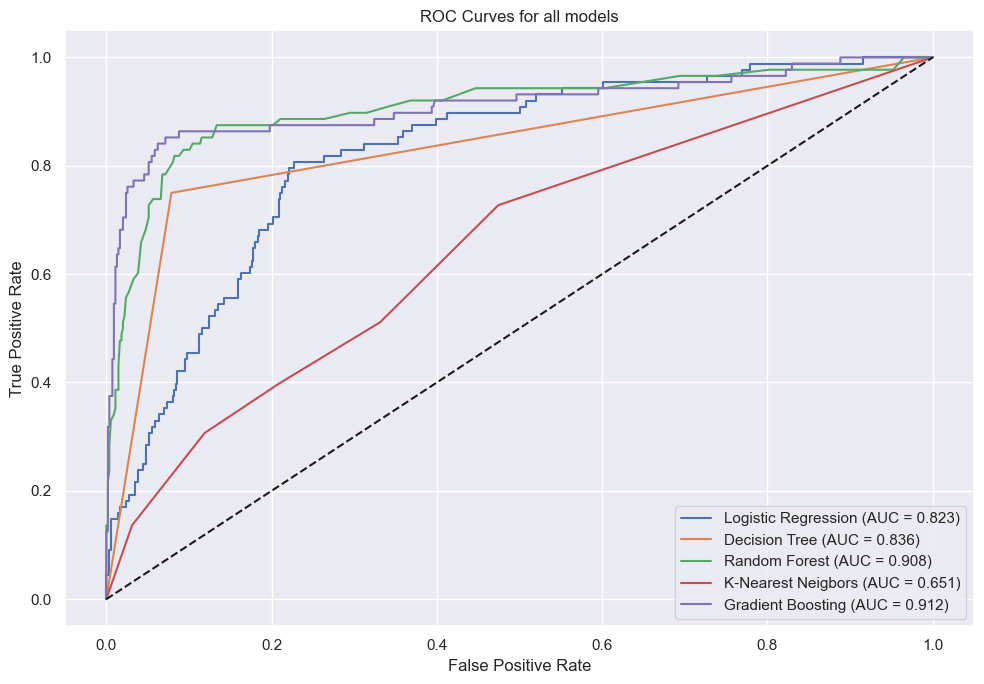

In [85]:
# get predicted probabilities for models that support `predict_proba`
model_dict = {
    'Logistic Regression': log_model,
    'Decision Tree': dec_model,
    'Random Forest': ran_model,
    'K-Nearest Neigbors': knn_model,
    'Gradient Boosting': gb_model
}

# define the plot size
plt.figure(figsize=(10, 7))

for name, model in model_dict.items():
    # predict probabilities
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test_scaled)[:, 1] # positive class
    else:
        # for models like XGBoost that use `predict()`
        y_probs = model.decision_function(X_test_scaled)

    # calculate ROC
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # plot the ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# plot setting
plt.plot([0, 1], [0, 1], 'k--') # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for all models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

From the ROC Curve plot, we can see that Random Forest, XGBoost, and Gradient Boosting have the highest AUC scores, with Gradient Boosting having an AUC score of 0.912, and XGBoost having an AUC score of 0.910. K-Nearest Neighbors has the lowest AUC score of 0.651

### 5.2. Recall Score
Recall is a performance metric that represents the proportion of correctly predicted positive observations out of all actual positive observations. In other terms:

Of all the actual positive items, how many did the model correctly identify?

A higher recall means very few false negatives, which implies that the model makes correct predictions more than false predictions, which is what we are after anyway.

In this section, we will create a table that has each model with its recall score. This will help in determining the top performing models on unseen data.

In [86]:
# compute recall for each model using model_dict and collect results
results = []
for name, model in model_dict.items():
    y_pred = model.predict(X_test_scaled)
    r = recall_score(y_test, y_pred)
    results.append({'Model': name, 'Recall': round(r, 3)})

# create and display a single table
recall_df = pd.DataFrame(results).sort_values(by='Recall', ascending=False).reset_index(drop=True)
recall_df

,Model,Recall
0,Gradient Boosting,0.807
1,Logistic Regression,0.750
2,Decision Tree,0.750
3,Random Forest,0.727
4,K-Nearest Neigbors,0.398


From the analysis on recall and ROC, we can conclude that the Gradient Boosting is the highest performing model, with a recall score of 0.807, and an AUC score of 0.912, follwoed by the XGBoost classifier, with a recall score of 0.795, and an AUC score of 0.910. We will perform hyperparameter tuning on these two models to try and improve the performance of each model, and again compare and see which model performs the best, based on those two metrics.

But before we go to hyperparameter tuning, we can check the top important features in the Gradient Boosting classifier.

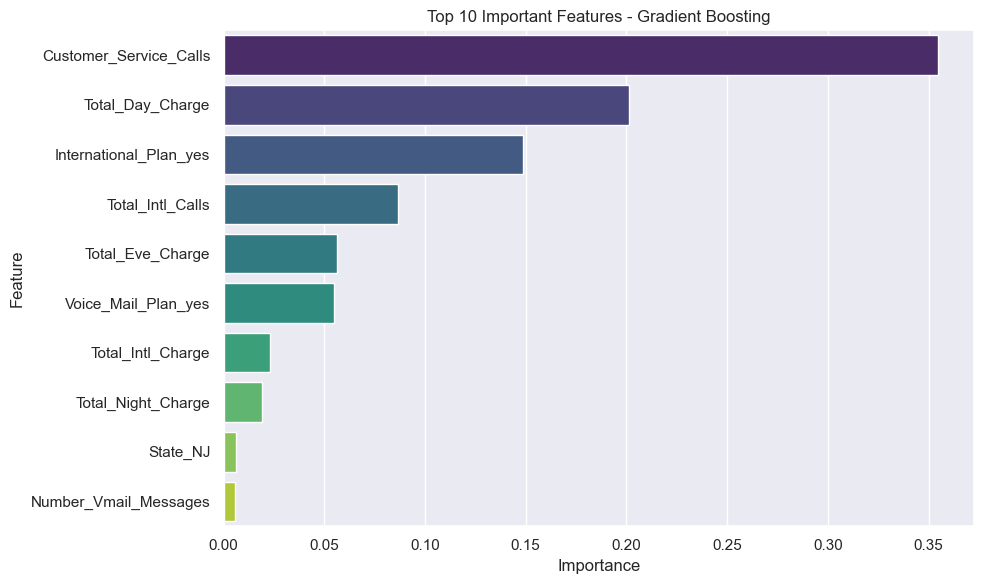

In [87]:
# get feature importances
importances = gb_model.feature_importances_
features = X_train.columns

# create a dataframe
feature_importance_df = pd.DataFrame(
    {
        'Feature': features,
        'Importance': importances
    }
).sort_values(by='Importance', ascending=False)

# plot the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features - Gradient Boosting')
plt.tight_layout()
plt.show()

From the plot, the most important features for the model are Customer_Service_Calls, Total_Day_Charge, and International_Plan_Yes

### 6. Model Hyperparameter Tuning.
Model hyperparameter tuning in classification machine learning entails optimizing the external configuration settings (hyperparameters) that guide the training process of a model. These parameters, such as the regularization strength in logistic regression, the number of neighbors in K-NN, or the maximum depth in decision trees, are not learned from data, but significantly influence model performance. Proper tuning ensures that the model generalizes well to unseen data, avoids overfitting, and achieves optimal performance metrics such as accuracy, recall, and f1 score.

Two common methods for hyperparameter tuning are Grid Search and Random Search:

Grid Search exhaustively tests every possible combination of specified hyperparameter values. For example, if tuning two hyperparameters with five options each, grid search will evaluate all 25 combinations. While this ensures that the optimal combination (within the grid) is found, it becomes computationally expensive and inefficient as the number of parameters or their value ranges increase.

Random Search on te other hand samples combinations of hyperparameters at random. While this doesn't guarantee evaluating all possibilities, it often determines a good (or even optimal) combination with fewer iterations, especially when only a few hyperparameters significantly affect model performance. This makes it faster and more scalable for high-dimensional search spaces.

Comparison

Grid Search is ideal when the hyperparameter space is small and well-defined.
Random Search is better suited for large, complex, or less-understood search spaces
In practice, Random Search if often more efficient, and can yield nearly optimal results in a fraction of the time, making it more suitable for many real-world classification tasks.

In this section, we will mainly use Random Search to obtain the best hyperparameters for training our model: Gradient Boosting 

### 6.1. Gradient Boosting Hyperparameter Tuning
We will first tune the Gradient Boosting model. The main parameters we will look out for in the tuning process are:

Learning rate: Controls the contribution of each tree to the final prediction. A smaller value makes the model more robust, but requires more estimators to achieve high performance. By default, learning_rate = 0.1

n_estimators: Defines the number of boosting iterations (trees) to be added. More estimators usually lead to better model performance, but also increases the risk of overfitting. By default, n_estimators = 100

max_depth: Specified the maximum depth of each individual tree. Shallow trees might underfit, while deeper trees can overfit. It is crucial to find the right depth. By default, max_depth = None